In [106]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import sys
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import matplotlib as mpl
mpl.rcParams['font.size'] = 20


In [108]:
#vedio
def globel_co2(time,dev,data,pw):

# wourld wide average carbon generation by unit power
    # cite: Obringer, Renee, et al. "The overlooked environmental footprint of increasing Internet use." Resources, Conservation and Recycling 167 (2021): 105389.

    p1=np.array([820,702,490,12,24,230,11,12,48,38,27])   #g Co2/kW
    p2=np.array([0.38106531, 0.03041596, 0.23030303, 0.10231508, 0.1582157 ,
           0.02394128, 0.04509693, 0.00252212, 0.02228496, 0.00338792,
           0.00045172])
    p_c=np.sum(p1*p2)


    #client - Desktop
    if dev=='notebook':

        p_client= 30 # W
    elif dev=='desktop':
    #client - Desktop
        p_client=150 #W
    elif dev=='phone':
    # phone
        p_client=10 # W
    

    # home network  bandwidth

    b_net=16 # GB/hour

    #total_gCO2e = data_utilsation*(data_centre_electricity usage +transmission_electricity usage)*gCO2e_for_electricity_generation

    # electricity consumption during operation , three parts:servers, clients, routers, per hour

    es_ser=  0.01*p_c     #  kW/GB*g/kW=g/GB
    #es_cli=  p_client*1/1000/(b_net)*p_c        #kW/h*1hour/GB in one hour * g/GB =g/GB
    es_rou=  0.06*p_c    # kW/GB*g/kW=g/GB

    # energy required for production, three parts: servers, clients, routers
    # google total 2500,000 servers, Youtube use 6-7 out of 34 data centers of google .  
    # cite: https://www.geeksforgeeks.org/how-does-youtube-store-and-analyze-such-huge-amount-of-data/
    # cite: https://en.wikipedia.org/wiki/Google_data_centers
    # cite: https://corporate.delltechnologies.com/en-gb/social-impact/advancing-sustainability/sustainable-products-and-services/product-carbon-footprints.htm#tab0=3
    # server life time : 4 years  
    # assume router has the same footprint as server.
    # one server foot print in manufacture and transport.
    
    # for youtube server
    p_single_server_list=[25.1/100*4800, 8.3/100*8160 ,7490*16.8/100 ,26.9*6180/100, 8970*20.4/100]
    p_single_server=np.mean(p_single_server_list)
    N_servers=2500000*(7/34)
    
    # per user per year
    #cite https://blog.hootsuite.com/youtube-stats-marketers/
    
    N_user=2e9 
    
    if dev=='desktop':
    # for personal computer desktop
    # cite: https://corporate.delltechnologies.com/en-gb/social-impact/advancing-sustainability/sustainable-products-and-services/product-carbon-footprints.htm#tab0=1
        pp1=np.array([512, 214, 488, 485,491,388,575,501,583,210,579,451,2496,1180,765,642,537,346])
        pp2=np.array([28.5, 26.3, 42.1,49,51,33,44,51,50,27,44,44,73.8,61.7,55.4,46.2,34.4,33.8])
        p_single_pc_list=(pp1*(100-pp2)/100)
        ep_cli_1=np.mean(p_single_pc_list)
    
    elif dev=='notebook':
    # for personal computer laptop
    # cite: https://corporate.delltechnologies.com/en-gb/social-impact/advancing-sustainability/sustainable-products-and-services/product-carbon-footprints.htm#tab0=0
        pp1=np.array([361,364,241,329,297,305,249,271,315,235,302,315,318,231,533,304,509,380,286,322,273,355])
        pp2=np.array([9.7,13,12.6,10.8,5.3,9.1,19.8,22,14.6,17.2,14.6,15.3,15,13,8.9,16.2,9.9,15.3,20,13.9,10,8.3])
        p_single_nb_list=(pp1*(100-pp2)/100)
        ep_cli_1=np.mean(p_single_nb_list)
    
    elif dev=='phone':
    # for cell phone
    # https://www.apple.com/environment/pdf/products/iphone/iPhone_12_PER_Oct2020.pdf
    # https://reboxed.co/blogs/outsidethebox/the-carbon-footprint-of-your-phone-and-how-you-can-reduce-it
    # use iphone as a example
        p_single_phone_list=np.array([86, 82, 70, 64, 57, 86, 80, 72, 77, 70, 62, 79, 68, 57, 67, 56])  # kg co2 in life time
        ep_cli_1=np.mean(p_single_phone_list)
    

    ep_ser=N_servers*p_single_server*(16/16)*1000/N_user
    ep_cli=ep_cli_1*1000   #g co2
    ep_rou=ep_ser  # same as server

    lifetime1=4*365*24 # year
    lifetime2=4*365*24 # year
    lifetime3=4*365*24 # year

    # total energy consumption is the sum of the above two parts.


    E1=es_ser+es_rou
    E2=ep_ser/lifetime1+ep_cli/lifetime2+ep_rou/lifetime3
    E3=T*pw*p_c

    E=T*data*E1+T*E2+E3
    
    e1=es_ser*T*data
    e2=es_rou*T*data
    e3=T*(ep_ser/lifetime1+ep_rou/lifetime3)
    e4=T*(ep_cli/lifetime2)
    e5=T*pw*p_c
    

    return E,e1,e2,e3,e4,e5

In [4]:
def co2_chat(time,dev,data):  # chat
    # cite: Obringer, Renee, et al. "The overlooked environmental footprint of increasing Internet use." Resources, Conservation and Recycling 167 (2021): 105389.
    p1=np.array([820,702,490,12,24,230,11,12,48,38,27])   #g Co2/kW
    p2=np.array([0.38106531, 0.03041596, 0.23030303, 0.10231508, 0.1582157 ,
           0.02394128, 0.04509693, 0.00252212, 0.02228496, 0.00338792,
           0.00045172])
    p_c=np.sum(p1*p2)


    #client - Desktop
    if dev=='notebook':

        p_client= 30 # W
    elif dev=='desktop':
    #client - Desktop
        p_client=150 #W
    elif dev=='phone':
    # phone
        p_client=10 # W

    # home network  bandwidth

    b_net=0.5 # GB/hour

    #total_gCO2e = data_utilsation*(data_centre_electricity usage +transmission_electricity usage)*gCO2e_for_electricity_generation

    # electricity consumption during operation , three parts:servers, clients, routers, per hour

    es_ser=  0.01*p_c     #  kW/GB*g/kW=g/GB
    es_cli=  p_client*1/1000/(b_net)*p_c        #kW/h*1hour/GB in one hour * g/GB =g/GB
    es_rou=  0.06*p_c    # kW/GB*g/kW=g/GB

    # energy required for production, three parts: servers, clients, routers

    # google total 2500,000 servers, Youtube use 6-7 out of 34 data centers of google .  
    # cite: https://www.geeksforgeeks.org/how-does-youtube-store-and-analyze-such-huge-amount-of-data/
    # cite: https://en.wikipedia.org/wiki/Google_data_centers
    # cite: https://corporate.delltechnologies.com/en-gb/social-impact/advancing-sustainability/sustainable-products-and-services/product-carbon-footprints.htm#tab0=3
    # server life time : 4 years  
    # assume router has the same footprint as server.
    # one server foot print in manufacture and transport.
    
    # for youtube server
    p_single_server_list=[25.1/100*4800, 8.3/100*8160 ,7490*16.8/100 ,26.9*6180/100, 8970*20.4/100]
    p_single_server=np.mean(p_single_server_list)
    N_servers=2500000*(7/34)
    
    # per user per year
    #cite https://blog.hootsuite.com/youtube-stats-marketers/
    
    N_user=2e9 
    
    # for personal computer desktop
    # cite: https://corporate.delltechnologies.com/en-gb/social-impact/advancing-sustainability/sustainable-products-and-services/product-carbon-footprints.htm#tab0=1
    pp1=np.array([512, 214, 488, 485,491,388,575,501,583,210,579,451,2496,1180,765,642,537,346])
    pp2=np.array([28.5, 26.3, 42.1,49,51,33,44,51,50,27,44,44,73.8,61.7,55.4,46.2,34.4,33.8])
    p_single_pc_list=(pp1*(100-pp2)/100)
    p_single_pc=np.mean(p_single_pc_list)
    
    
    # for personal computer laptop
    # cite: https://corporate.delltechnologies.com/en-gb/social-impact/advancing-sustainability/sustainable-products-and-services/product-carbon-footprints.htm#tab0=0
    pp1=np.array([361,364,241,329,297,305,249,271,315,235,302,315,318,231,533,304,509,380,286,322,273,355])
    pp2=np.array([9.7,13,12.6,10.8,5.3,9.1,19.8,22,14.6,17.2,14.6,15.3,15,13,8.9,16.2,9.9,15.3,20,13.9,10,8.3])
    p_single_nb_list=(pp1*(100-pp2)/100)
    p_single_nb=np.mean(p_single_nb_list)
    
    # for cell phone
    # https://www.apple.com/environment/pdf/products/iphone/iPhone_12_PER_Oct2020.pdf
    # https://reboxed.co/blogs/outsidethebox/the-carbon-footprint-of-your-phone-and-how-you-can-reduce-it
    # use iphone as a example


    p_single_phone_list=np.array([86, 82, 70, 64, 57, 86, 80, 72, 77, 70, 62, 79, 68, 57, 67, 56])  # kg co2 in life time
    p_single_phone=np.mean(p_single_phone_list)
    

    ep_ser=N_servers*p_single_server*(b_net/16)*1000/N_user
    ep_cli=p_single_phone*1000   #g co2
    ep_rou=ep_ser  # same as server

    lifetime1=4*365*24 # year
    lifetime2=4*365*24 # year
    lifetime3=4*365*24 # year

    # total energy consumption is the sum of the above two parts.


    E1=es_ser+es_cli+es_rou
    E2=ep_ser/lifetime1+ep_cli/lifetime2+ep_rou/lifetime3

    E=data*E1+T*E2


    return E

In [5]:
def co2_web(time,dev,data): # web
    # cite: Obringer, Renee, et al. "The overlooked environmental footprint of increasing Internet use." Resources, Conservation and Recycling 167 (2021): 105389.
    p1=np.array([820,702,490,12,24,230,11,12,48,38,27])   #g Co2/kW
    p2=np.array([0.38106531, 0.03041596, 0.23030303, 0.10231508, 0.1582157 ,
           0.02394128, 0.04509693, 0.00252212, 0.02228496, 0.00338792,
           0.00045172])
    p_c=np.sum(p1*p2)


    #client - Desktop
    if dev=='notebook':

        p_client= 30 # W
    elif dev=='desktop':
    #client - Desktop
        p_client=150 #W
    elif dev=='phone':
    # phone
        p_client=10 # W

    # home network  bandwidth

    b_net=0.4 # GB/hour

    #total_gCO2e = data_utilsation*(data_centre_electricity usage +transmission_electricity usage)*gCO2e_for_electricity_generation

    # electricity consumption during operation , three parts:servers, clients, routers, per hour

    es_ser=  0.01*p_c     #  kW/GB*g/kW=g/GB
    es_cli=  p_client*1/1000/(b_net)*p_c        #kW/h*1hour/GB in one hour * g/GB =g/GB
    es_rou=  0.06*p_c    # kW/GB*g/kW=g/GB

    # energy required for production, three parts: servers, clients, routers

    # google total 2500,000 servers, Youtube use 6-7 out of 34 data centers of google .  
    # cite: https://www.geeksforgeeks.org/how-does-youtube-store-and-analyze-such-huge-amount-of-data/
    # cite: https://en.wikipedia.org/wiki/Google_data_centers
    # cite: https://corporate.delltechnologies.com/en-gb/social-impact/advancing-sustainability/sustainable-products-and-services/product-carbon-footprints.htm#tab0=3
    # server life time : 4 years  
    # assume router has the same footprint as server.
    # one server foot print in manufacture and transport.
    
    # for youtube server
    p_single_server_list=[25.1/100*4800, 8.3/100*8160 ,7490*16.8/100 ,26.9*6180/100, 8970*20.4/100]
    p_single_server=np.mean(p_single_server_list)
    N_servers=2500000*(7/34)
        
    # per user per year
    #cite https://blog.hootsuite.com/youtube-stats-marketers/
    
    N_user=2e9 
    
    # for personal computer desktop
    # cite: https://corporate.delltechnologies.com/en-gb/social-impact/advancing-sustainability/sustainable-products-and-services/product-carbon-footprints.htm#tab0=1
    pp1=np.array([512, 214, 488, 485,491,388,575,501,583,210,579,451,2496,1180,765,642,537,346])
    pp2=np.array([28.5, 26.3, 42.1,49,51,33,44,51,50,27,44,44,73.8,61.7,55.4,46.2,34.4,33.8])
    p_single_pc_list=(pp1*(100-pp2)/100)
    p_single_pc=np.mean(p_single_pc_list)
    
    
    # for personal computer laptop
    # cite: https://corporate.delltechnologies.com/en-gb/social-impact/advancing-sustainability/sustainable-products-and-services/product-carbon-footprints.htm#tab0=0
    pp1=np.array([361,364,241,329,297,305,249,271,315,235,302,315,318,231,533,304,509,380,286,322,273,355])
    pp2=np.array([9.7,13,12.6,10.8,5.3,9.1,19.8,22,14.6,17.2,14.6,15.3,15,13,8.9,16.2,9.9,15.3,20,13.9,10,8.3])
    p_single_nb_list=(pp1*(100-pp2)/100)
    p_single_nb=np.mean(p_single_nb_list)
    
    # for cell phone
    # https://www.apple.com/environment/pdf/products/iphone/iPhone_12_PER_Oct2020.pdf
    # https://reboxed.co/blogs/outsidethebox/the-carbon-footprint-of-your-phone-and-how-you-can-reduce-it
    # use iphone as a example


    p_single_phone_list=np.array([86, 82, 70, 64, 57, 86, 80, 72, 77, 70, 62, 79, 68, 57, 67, 56])  # kg co2 in life time
    p_single_phone=np.mean(p_single_phone_list)
    

    ep_ser=N_servers*p_single_server*(b_net/16)*1000/N_user
    ep_cli=p_single_phone*1000   #g co2
    ep_rou=ep_ser  # same as server

    lifetime1=4*365*24 # year
    lifetime2=4*365*24 # year
    lifetime3=4*365*24 # year

    # total energy consumption is the sum of the above two parts.


    E1=es_ser+es_cli+es_rou
    E2=ep_ser/lifetime1+ep_cli/lifetime2+ep_rou/lifetime3

    E=data*E1+T*E2


    return E

In [6]:
def co2_game(time,dev,data): #game
    # cite: Obringer, Renee, et al. "The overlooked environmental footprint of increasing Internet use." Resources, Conservation and Recycling 167 (2021): 105389.
    p1=np.array([820,702,490,12,24,230,11,12,48,38,27])   #g Co2/kW
    p2=np.array([0.38106531, 0.03041596, 0.23030303, 0.10231508, 0.1582157 ,
           0.02394128, 0.04509693, 0.00252212, 0.02228496, 0.00338792,
           0.00045172])
    p_c=np.sum(p1*p2)


    #client - Desktop
    if dev=='notebook':

        p_client= 30 # W
    elif dev=='desktop':
    #client - Desktop
        p_client=500 #W
    elif dev=='phone':
    # phone
        p_client=10 # W

    # home network  bandwidth

    b_net=0.3 # GB/hour

    #total_gCO2e = data_utilsation*(data_centre_electricity usage +transmission_electricity usage)*gCO2e_for_electricity_generation

    # electricity consumption during operation , three parts:servers, clients, routers, per hour

    es_ser=  0.01*p_c     #  kW/GB*g/kW=g/GB
    es_cli=  p_client*1/1000/(b_net)*p_c        #kW/h*1hour/GB in one hour * g/GB =g/GB
    es_rou=  0.06*p_c    # kW/GB*g/kW=g/GB

    # energy required for production, three parts: servers, clients, routers
    # google total 2500,000 servers, Youtube use 6-7 out of 34 data centers of google .  
    # cite: https://www.geeksforgeeks.org/how-does-youtube-store-and-analyze-such-huge-amount-of-data/
    # cite: https://en.wikipedia.org/wiki/Google_data_centers
    # cite: https://corporate.delltechnologies.com/en-gb/social-impact/advancing-sustainability/sustainable-products-and-services/product-carbon-footprints.htm#tab0=3
    # server life time : 4 years  
    # assume router has the same footprint as server.
    # one server foot print in manufacture and transport.
    
    # for youtube server
    p_single_server_list=[25.1/100*4800, 8.3/100*8160 ,7490*16.8/100 ,26.9*6180/100, 8970*20.4/100]
    p_single_server=np.mean(p_single_server_list)
    N_servers=2500000*(7/34)
    
        
    # per user per year
    #cite https://blog.hootsuite.com/youtube-stats-marketers/
    
    N_user=2e9 
    
    # for personal computer desktop
    # cite: https://corporate.delltechnologies.com/en-gb/social-impact/advancing-sustainability/sustainable-products-and-services/product-carbon-footprints.htm#tab0=1
    pp1=np.array([512, 214, 488, 485,491,388,575,501,583,210,579,451,2496,1180,765,642,537,346])
    pp2=np.array([28.5, 26.3, 42.1,49,51,33,44,51,50,27,44,44,73.8,61.7,55.4,46.2,34.4,33.8])
    p_single_pc_list=(pp1*(100-pp2)/100)
    p_single_pc=np.mean(p_single_pc_list)
    
    
    # for personal computer laptop
    # cite: https://corporate.delltechnologies.com/en-gb/social-impact/advancing-sustainability/sustainable-products-and-services/product-carbon-footprints.htm#tab0=0
    pp1=np.array([361,364,241,329,297,305,249,271,315,235,302,315,318,231,533,304,509,380,286,322,273,355])
    pp2=np.array([9.7,13,12.6,10.8,5.3,9.1,19.8,22,14.6,17.2,14.6,15.3,15,13,8.9,16.2,9.9,15.3,20,13.9,10,8.3])
    p_single_nb_list=(pp1*(100-pp2)/100)
    p_single_nb=np.mean(p_single_nb_list)
    
    # for cell phone
    # https://www.apple.com/environment/pdf/products/iphone/iPhone_12_PER_Oct2020.pdf
    # https://reboxed.co/blogs/outsidethebox/the-carbon-footprint-of-your-phone-and-how-you-can-reduce-it
    # use iphone as a example


    p_single_phone_list=np.array([86, 82, 70, 64, 57, 86, 80, 72, 77, 70, 62, 79, 68, 57, 67, 56])  # kg co2 in life time
    p_single_phone=np.mean(p_single_phone_list)
    

    ep_ser=N_servers*p_single_server*(b_net/16)*1000/N_user
    ep_cli=p_single_phone*1000   #g co2
    ep_rou=ep_ser  # same as server

    lifetime1=4*365*24 # year
    lifetime2=4*365*24 # year
    lifetime3=4*365*24 # year

    # total energy consumption is the sum of the above two parts.


    E1=es_ser+es_cli+es_rou
    E2=ep_ser/lifetime1+ep_cli/lifetime2+ep_rou/lifetime3

    E=data*E1+T*E2


    return E

In [7]:
def cal_co2_comp(pw):
    # four year usuage
    t_off=0.55
    T_sleep=0.05
    T_run=0.4
    p1=2
    p2=5
    p3=25
    E_etc=8760*(p1*t_off+p2*T_sleep+p3*T_run)
    p11= 5   #memory
    p21=  250  #GPU
    p31=  5  #disk
    
    E_fa=8760*(p11*t_off+p21*T_sleep+p31*T_run)
    
    E_run=4*(E_etc+E_fa)
    
    E3=8760*(p1*T_off+p2*t_sleep+pw*T_run)
    return E_run

In [8]:
def cal_co2_serv(pw,year):
    # four year usuage
    E3=year*8760*pw
    return E_run

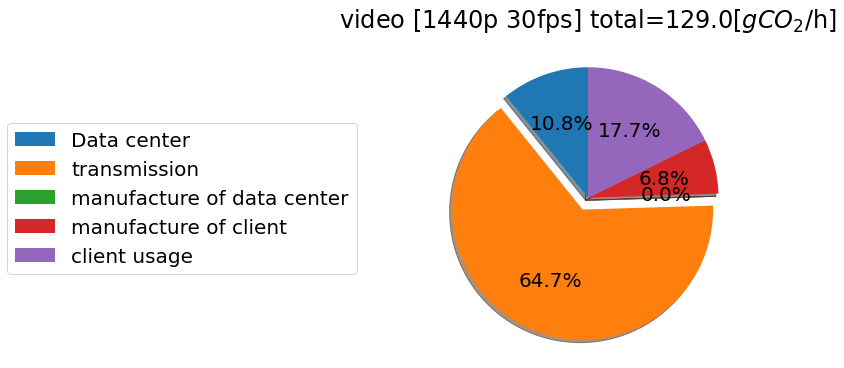

In [90]:
# youtube
# please input your app as four categrates
app='video'
app='chat'
app='game'
app='web'
# how long you use your device per day in hour?
T=1  # hours
# what kind of device you use
Dev='laptop'
Dev='phone'
Dev='desktop'
# how many data you use?
Data= 3.04  #GB
pw=0.05

[w_carbon1,e1,e2,e3,e4,e5]=globel_co2(T,Dev,Data,pw)  # unit g co2
labels = 'Data center','transmission','manufacture of data center', 'manufacture of client','client usage'
sizes = [e1,e2,e3,e4,e5]
explode = (0,0.1,0, 0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(6,6))
ax1.pie(sizes, explode=explode, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.set(aspect='equal',title=f"video [1440p 30fps] total={round(w_carbon1,0)}[$gCO_2$/h]")  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(labels, bbox_to_anchor=(0,0.5), loc="center right", 
                          bbox_transform=plt.gcf().transFigure)
plt.show()

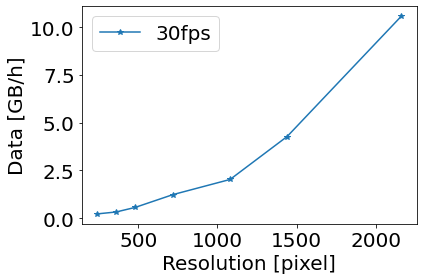

In [21]:
y1=[240 ,360 ,480, 720, 1080 ,1440, 2160]
Data1=[0.225,0.325,0.5625,1.2375,2.03,4.28,10.58] # data per hour [240p 360p 480p 720p 1080p 1440p 2160p]
fig1, axc = plt.subplots(figsize=(6,4))
plt.plot(y1,Data1,'*-',label='30fps')
plt.xlabel('Resolution [pixel]')
plt.ylabel('Data [GB/h]')
plt.legend()
plt.show()

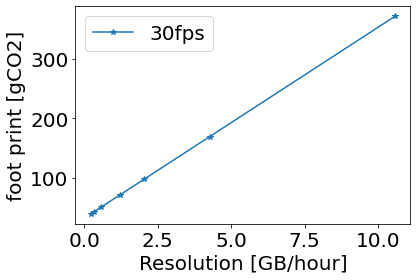

In [22]:
Data1=[0.225,0.325,0.5625,1.2375,2.03,4.28,10.58] # data per hour [240p 360p 480p 720p 1080p 1440p 2160p]
app='video'
Dev='desktop'
pw=0.05
A=[]
T=1
for i in range(7):
    Data=Data1[i]
    [w_carbon1,e1,e2,e3,e4,e5]=globel_co2(T,Dev,Data,pw)  # unit g co2
    A.append(w_carbon1)   
fig1, axc = plt.subplots(figsize=(6,4))
plt.plot(Data1,A,'*-',label='30fps')
plt.xlabel('Resolution [GB/hour]')
plt.ylabel('foot print [gCO2]')
plt.legend()
plt.show()

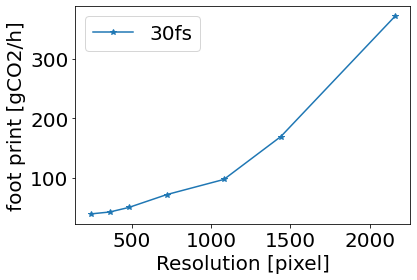

In [23]:
y1=[240 ,360 ,480, 720, 1080 ,1440, 2160]
Data1=[0.225,0.325,0.5625,1.2375,2.03,4.28,10.58] # data per hour [240p 360p 480p 720p 1080p 1440p 2160p]
app='video'
Dev='desktop'
pw=0.05
A=[]
T=1
for i in range(7):
    Data=Data1[i]
    [w_carbon1,e1,e2,e3,e4,e5]=globel_co2(T,Dev,Data,pw)  # unit g co2
    A.append(w_carbon1)   
fig1, axc = plt.subplots(figsize=(6,4))
plt.plot(y1,A,'*-',label='30fs')
plt.xlabel('Resolution [pixel]')
plt.ylabel('foot print [gCO2/h]')
plt.legend()
plt.show()

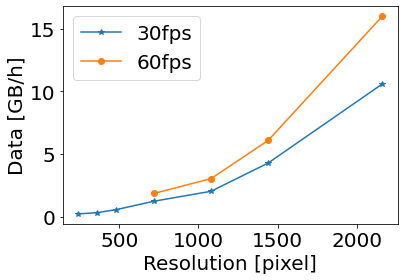

In [24]:
y1=[240 ,360 ,480, 720, 1080 ,1440, 2160]
Data1=[0.225,0.325,0.5625,1.2375,2.03,4.28,10.58] # data per hour [240p 360p 480p 720p 1080p 1440p 2160p]
y2=[720, 1080, 1440, 2160]
Data2=[1.856,3.04,6.08,15.98]
 
fig1, axc = plt.subplots(figsize=(6,4))
plt.plot(y1,Data1,'*-',label='30fps')
plt.plot(y2,Data2,'o-',label='60fps')
plt.xlabel('Resolution [pixel]')
plt.ylabel('Data [GB/h]')
plt.legend()
plt.show()

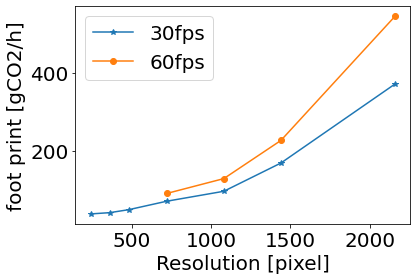

[38.94232250012928, 42.154919595039274, 49.78483769545053, 71.46986808609303, 96.92970006325477, 169.2131346987298, 371.60675167805977]
[91.33978111811139, 129.37693072184578, 227.03988240710976, 545.0869948031998]


In [91]:
y1=[240 ,360 ,480, 720, 1080 ,1440, 2160]
Data1=[0.225,0.325,0.5625,1.2375,2.03,4.28,10.58] # data per hour [240p 360p 480p 720p 1080p 1440p 2160p]
y2=[720, 1080, 1440, 2160]
Data2=[1.856,3.04,6.08,15.98]
app='video'
Dev='desktop'
pw=0.05
A=[]
A1=[]
T=1
for i in range(7):
    Data=Data1[i]
    [w_carbon1,e1,e2,e3,e4,e5]=globel_co2(T,Dev,Data,pw)  # unit g co2
    A.append(w_carbon1)   
    
for i in range(4):
    Data=Data2[i]
    [w_carbon1,e1,e2,e3,e4,e5]=globel_co2(T,Dev,Data,pw)  # unit g co2
    A1.append(w_carbon1)    
fig1, axc = plt.subplots(figsize=(6,4))
plt.plot(y1,A,'*-',label='30fps')
plt.plot(y2,A1,'o-',label='60fps')
plt.xlabel('Resolution [pixel]')
plt.ylabel('foot print [gCO2/h]')
plt.legend()
plt.show()
print(A)
print(A1)

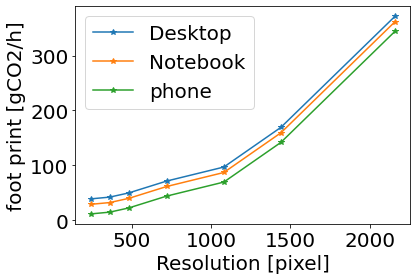

[38.94232250012928, 42.154919595039274, 49.78483769545053, 71.46986808609303, 96.92970006325477, 169.2131346987298, 371.60675167805977] [29.02510639471852, 32.237703489628515, 39.86762159003977, 61.55265198068227, 87.01248395784401, 159.29591859331904, 361.689535572649] [11.563446026400026, 14.776043121310025, 22.405961221721277, 44.09099161236377, 69.55082358952552, 141.83425822500055, 344.22787520433053]


In [94]:
y1=[240 ,360 ,480, 720, 1080 ,1440, 2160]
Data1=[0.225,0.325,0.5625,1.2375,2.03,4.28,10.58] # data per hour [240p 360p 480p 720p 1080p 1440p 2160p]
app='video'
Dev='desktop'
pw1=0.05
A1=[]
T=1
for i in range(7):
    Data=Data1[i]
    [w_carbon1,e1,e2,e3,e4,e5]=globel_co2(T,Dev,Data,pw1)  # unit g co2
    A1.append(w_carbon1)
app='video'
Dev='notebook'
pw1=0.03
A2=[]
T=1
for i in range(7):
    Data=Data1[i]
    [w_carbon1,e1,e2,e3,e4,e5]=globel_co2(T,Dev,Data,pw1)  # unit g co2
    A2.append(w_carbon1)   
app='video'
Dev='phone'
pw1=0.005
A3=[]
T=1
for i in range(7):
    Data=Data1[i]
    [w_carbon1,e1,e2,e3,e4,e5]=globel_co2(T,Dev,Data,pw1)  # unit g co2
    A3.append(w_carbon1)   
fig1, axc = plt.subplots(figsize=(6,4))
plt.plot(y1,A1,'*-',label='Desktop')
plt.plot(y1,A2,'*-',label='Notebook')
plt.plot(y1,A3,'*-',label='phone')
plt.xlabel('Resolution [pixel]')
plt.ylabel('foot print [gCO2/h]')
plt.legend()
plt.show()
print(A1,A2,A3)

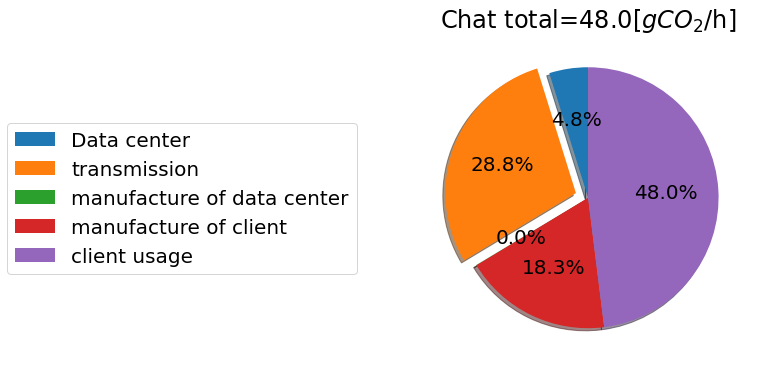

In [77]:
# chat
# please input your app as four categrates
app='video'
app='chat'
app='game'
app='web'
# how long you use your device per day in hour?
T=1  # hours
# what kind of device you use
Dev='laptop'
Dev='phone'
Dev='desktop'
# how many data you use?
Data= 0.5  #GB/h
pw=50/1000
[w_carbon2,e1,e2,e3,e4,e5]=globel_co2(T,Dev,Data,pw)  # unit g co2
labels = 'Data center','transmission','manufacture of data center', 'manufacture of client','client usage'
sizes = [e1,e2,e3,e4,e5]
explode = (0,0.1,0, 0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')
fig1, ax1 = plt.subplots(figsize=(6,6))
ax1.pie(sizes, explode=explode, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.set(aspect='equal',title=f"Chat total={round(w_carbon2,0)}[$gCO_2$/h]")  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(labels, bbox_to_anchor=(0,0.5), loc="center right", 
                          bbox_transform=plt.gcf().transFigure)
plt.show()

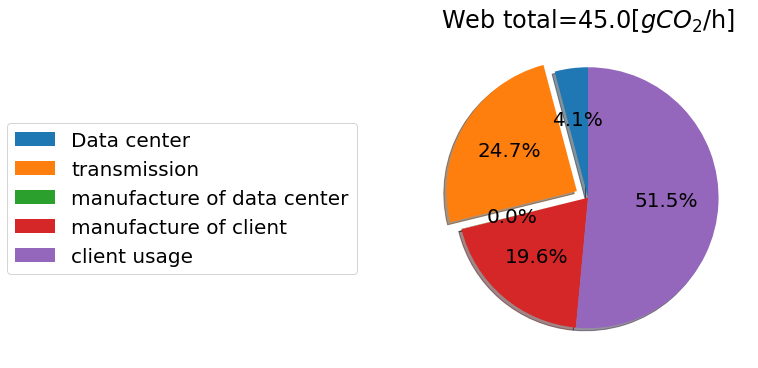

In [78]:
# web
# please input your app as four categrates
app='video'
app='chat'
app='game'
app='web'
# how long you use your device per day in hour?
T=1  # hours
# what kind of device you use
Dev='laptop'
Dev='phone'
Dev='desktop'
# how many data you use?
Data= 0.4  #GB/h
pw=50/1000
[w_carbon3,e1,e2,e3,e4,e5]=globel_co2(T,Dev,Data,pw)  # unit g co2
labels = 'Data center','transmission','manufacture of data center', 'manufacture of client','client usage'
sizes = [e1,e2,e3,e4,e5]
explode = (0,0.1,0, 0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')
fig1, ax1 = plt.subplots(figsize=(6,6))
ax1.pie(sizes, explode=explode, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.set(aspect='equal',title=f"Web total={round(w_carbon3,0)}[$gCO_2$/h]")  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(labels, bbox_to_anchor=(0,0.5), loc="center right", 
                          bbox_transform=plt.gcf().transFigure)
plt.show()

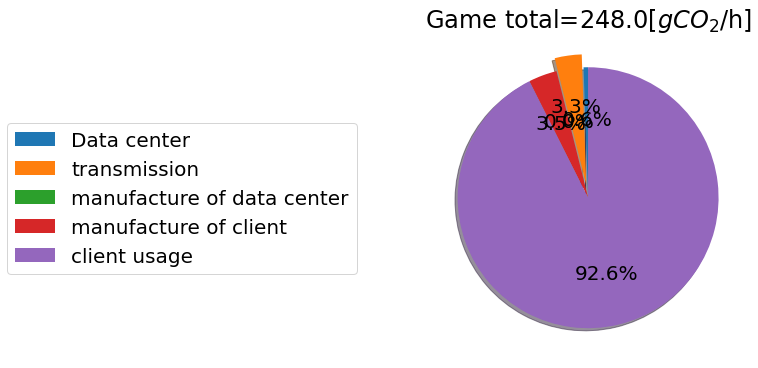

In [79]:
# game
# please input your app as four categrates
app='video'
app='chat'
app='game'
app='web'
# how long you use your device per day in hour?
T=1  # hours
# what kind of device you use
Dev='laptop'
Dev='phone'
Dev='desktop'
# how many data you use?
Data= 0.3  #GB/h
pw=500/1000
[w_carbon4,e1,e2,e3,e4,e5]=globel_co2(T,Dev,Data,pw)  # unit g co2
sizes = [e1,e2,e3,e4,e5]
explode = (0,0.1,0, 0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')
labels = 'Data center','transmission','manufacture of data center', 'manufacture of client','client usage'
fig1, ax1 = plt.subplots(figsize=(6,6))
ax1.pie(sizes, explode=explode, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.set(aspect='equal',title=f"Game total={round(w_carbon4,0)}[$gCO_2$/h]")  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(labels, bbox_to_anchor=(0,0.5), loc="center right", 
                          bbox_transform=plt.gcf().transFigure)
plt.show()

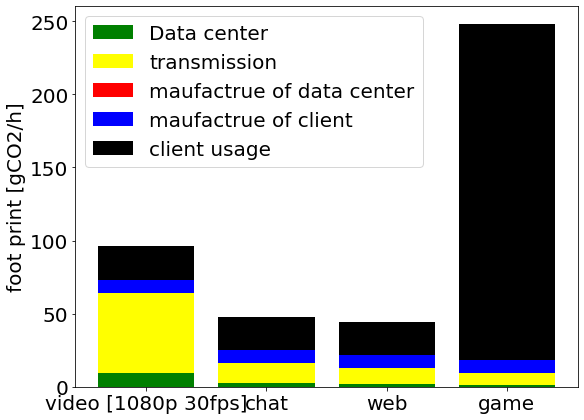

In [47]:
# with desktop
T=1
Dev='desktop'
Data=[2,0.5,0.4,0.3]
pw=[0.05,0.05,0.05,0.5]
[w_carbon1,e1,e2,e3,e4,e5]=globel_co2(T,Dev,Data[0],pw[0])  # unit g co2
data1=[e1,e2,e3,e4,e5]
[w_carbon2,e1,e2,e3,e4,e5]=globel_co2(T,Dev,Data[1],pw[1])  # unit g co2
data2=[e1,e2,e3,e4,e5]
[w_carbon3,e1,e2,e3,e4,e5]=globel_co2(T,Dev,Data[2],pw[2])  # unit g co2
data3=[e1,e2,e3,e4,e5]
[w_carbon4,e1,e2,e3,e4,e5]=globel_co2(T,Dev,Data[3],pw[3])  # unit g co2
data4=[e1,e2,e3,e4,e5]

year=["video [1080p 30fps]","chat","web","game"]

y1=[data1[0],data2[0],data3[0],data4[0]]
y2=[data1[1],data2[1],data3[1],data4[1]]
y3=[data1[2],data2[2],data3[2],data4[2]]
y4=[data1[3],data2[3],data3[3],data4[3]]
y5=[data1[4],data2[4],data3[4],data4[4]]

plt.figure(figsize=(9,7))
plt.bar(year,y1,color="green",label="Data center")
plt.bar(year,y2,color="yellow",bottom=np.array(y1),label="transmission")
plt.bar(year,y3,color="red",bottom=np.array(y1)+np.array(y2),label="maufactrue of data center")
plt.bar(year,y4,color="blue",bottom=np.array(y1)+np.array(y2)+np.array(y3),label="maufactrue of client")
plt.bar(year,y5,color="black",bottom=np.array(y1)+np.array(y2)+np.array(y3)+np.array(y4),label="client usage")
plt.ylabel('foot print [gCO2/h]')
plt.legend()
plt.show()

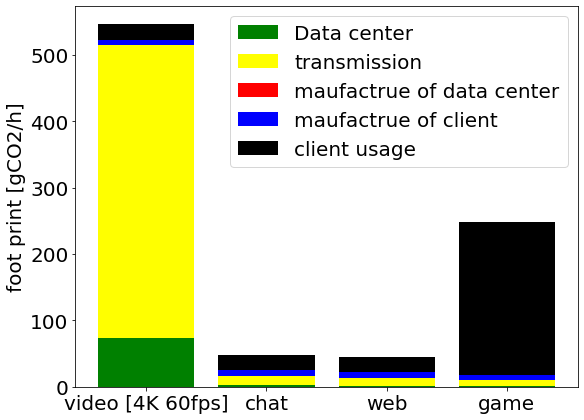

In [48]:
# with desktop
T=1
Dev='desktop'
Data=[16,0.5,0.4,0.3]
pw=[0.05,0.05,0.05,0.5]
[w_carbon1,e1,e2,e3,e4,e5]=globel_co2(T,Dev,Data[0],pw[0])  # unit g co2
data1=[e1,e2,e3,e4,e5]
[w_carbon2,e1,e2,e3,e4,e5]=globel_co2(T,Dev,Data[1],pw[1])  # unit g co2
data2=[e1,e2,e3,e4,e5]
[w_carbon3,e1,e2,e3,e4,e5]=globel_co2(T,Dev,Data[2],pw[2])  # unit g co2
data3=[e1,e2,e3,e4,e5]
[w_carbon4,e1,e2,e3,e4,e5]=globel_co2(T,Dev,Data[3],pw[3])  # unit g co2
data4=[e1,e2,e3,e4,e5]

year=["video [4K 60fps]","chat","web","game"]

y1=[data1[0],data2[0],data3[0],data4[0]]
y2=[data1[1],data2[1],data3[1],data4[1]]
y3=[data1[2],data2[2],data3[2],data4[2]]
y4=[data1[3],data2[3],data3[3],data4[3]]
y5=[data1[4],data2[4],data3[4],data4[4]]

plt.figure(figsize=(9,7))
plt.bar(year,y1,color="green",label="Data center")
plt.bar(year,y2,color="yellow",bottom=np.array(y1),label="transmission")
plt.bar(year,y3,color="red",bottom=np.array(y1)+np.array(y2),label="maufactrue of data center")
plt.bar(year,y4,color="blue",bottom=np.array(y1)+np.array(y2)+np.array(y3),label="maufactrue of client")
plt.bar(year,y5,color="black",bottom=np.array(y1)+np.array(y2)+np.array(y3)+np.array(y4),label="client usage")
plt.ylabel('foot print [gCO2/h]')
plt.legend()
plt.show()

In [177]:
# with desktop
T=1
Dev='desktop'
Data1=[1,1.4,0.9,0.2,None,0.1,0.5,0.5,None,0.3,None,0.1,None,None,None,0.5,0.008,0.004,0.04,None]
Data2=[7,7.2,7,16,0.04,1.86,2.5,2.58,0.18,3.24,0.48,0.16,0.36,0.1,0.16,1.4,0.4,0.11,0.3,0.15]

B11=[28.056, 37.876, 25.251,  6.313,  0.   ,  2.806, 15.15 , 12.625,
        0.   ,  7.575,  0.   ,  2.525,  0.   ,  0.   ,  0.   , 13.467,
        0.224,  0.112,  1.122,  0.   ]

B22=[440.565,  453.153,  440.565, 1005.747,    2.518,  117.064,
        157.345,  162.38 ,   11.329,  203.919,   30.21 ,    9.818,
         22.658,    6.294,   10.07 ,   88.113,   25.175,    6.923,
         18.881,    9.441]
pw=0.05
A11=[]
A22=[]
for i in range(20):
    Data=Data1[i]
    if Data==None:
        w_carbon1=0
    else:
        [w_carbon1,e1,e2,e3,e4,e5]=globel_co2(T,Dev,Data,pw)  # unit g co2
    A11.append(w_carbon1)
for i in range(20):
    Data=Data2[i]
    if Data==None:
        w_carbon1=0
    else:
        [w_carbon1,e1,e2,e3,e4,e5]=globel_co2(T,Dev,Data,pw)  # unit g co2
    A22.append(w_carbon1)

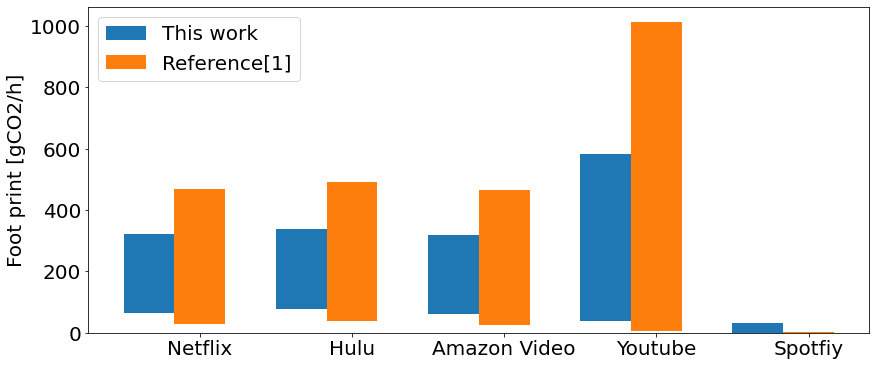

In [185]:
fig1, axc = plt.subplots(figsize=(14,6))
A1=A11[0:5]
A2=A22[0:5]
B1=B11[0:5]
B2=B22[0:5]
data = A2
labels = ['Netflix','Hulu','Amazon Video','Youtube','Spotfiy']#,'Skype','Zoom' ,'Webex' ,'FaceTime' ,'Google Hangout' ,'Google Duo' ,'Facebook' ,'Twitter' ,'Instagram' ,'Snapchat' ,'TikTok' ,'WhatsApp' ,'WeChat' ,'Online Gaming' ,'Web Surfing' ]
plt.bar(3*np.arange(len(B2)), data, bottom=A1,width=1,tick_label=labels,label='This work')
plt.bar(3*np.arange(len(B2))+1, B2, bottom=B1,width=1,tick_label=labels,label='Reference[1]')
plt.legend()
plt.ylabel('Foot print [gCO2/h]')
plt.show()

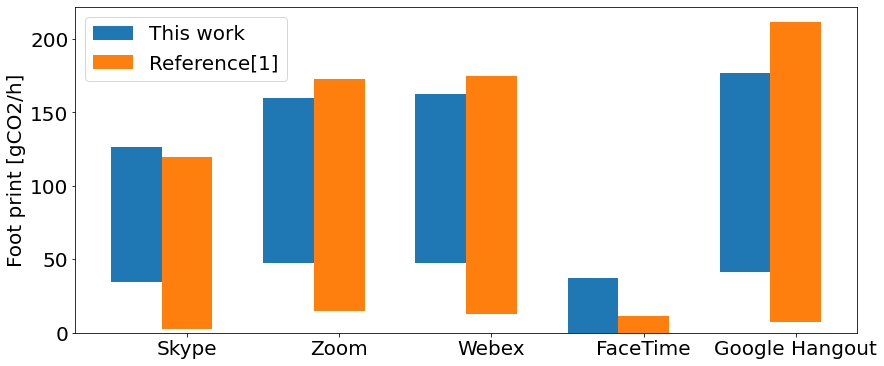

In [184]:
fig1, axc = plt.subplots(figsize=(14,6))
A1=A11[5:10]
A2=A22[5:10]
B1=B11[5:10]
B2=B22[5:10]
data = A2
labels = ['Skype','Zoom' ,'Webex' ,'FaceTime' ,'Google Hangout']#,'Skype','Zoom' ,'Webex' ,'FaceTime' ,'Google Hangout' ,'Google Duo' ,'Facebook' ,'Twitter' ,'Instagram' ,'Snapchat' ,'TikTok' ,'WhatsApp' ,'WeChat' ,'Online Gaming' ,'Web Surfing' ]
plt.bar(3*np.arange(len(B2)), data, bottom=A1,width=1,tick_label=labels,label='This work')
plt.bar(3*np.arange(len(B2))+1, B2, bottom=B1,width=1,tick_label=labels,label='Reference[1]')
plt.legend()
plt.ylabel('Foot print [gCO2/h]')
plt.show()

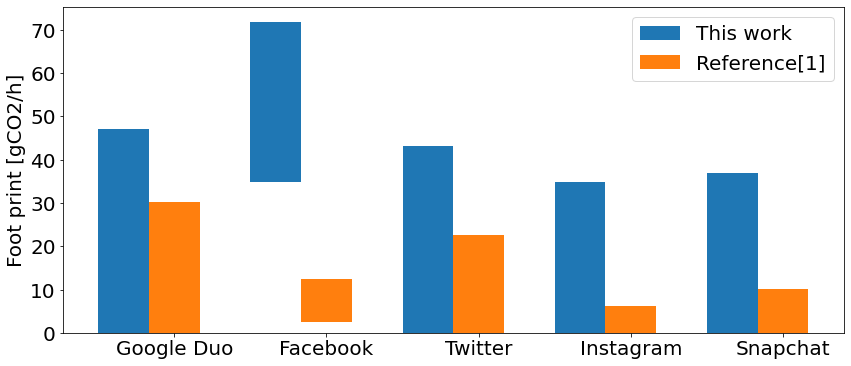

In [186]:
fig1, axc = plt.subplots(figsize=(14,6))
A1=A11[10:15]
A2=A22[10:15]
B1=B11[10:15]
B2=B22[10:15]
data = A2
labels = ['Google Duo' ,'Facebook' ,'Twitter' ,'Instagram' ,'Snapchat']#,'Skype','Zoom' ,'Webex' ,'FaceTime' ,'Google Hangout' ,'Google Duo' ,'Facebook' ,'Twitter' ,'Instagram' ,'Snapchat' ,'TikTok' ,'WhatsApp' ,'WeChat' ,'Online Gaming' ,'Web Surfing' ]
plt.bar(3*np.arange(len(B2)), data, bottom=A1,width=1,tick_label=labels,label='This work')
plt.bar(3*np.arange(len(B2))+1, B2, bottom=B1,width=1,tick_label=labels,label='Reference[1]')
plt.legend()
plt.ylabel('Foot print [gCO2/h]')
plt.show()

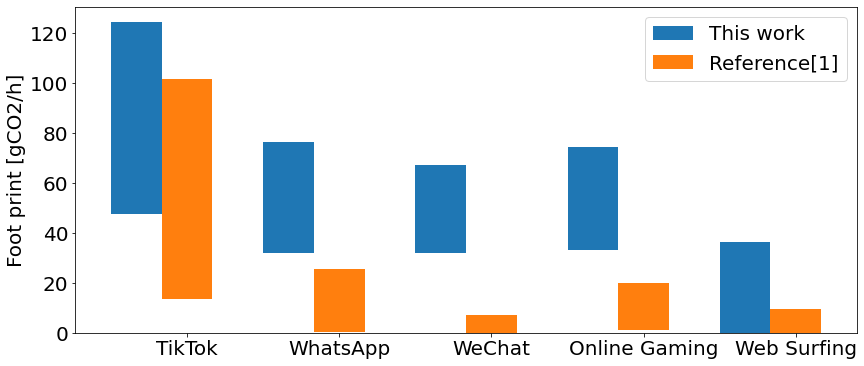

In [187]:
fig1, axc = plt.subplots(figsize=(14,6))
A1=A11[15:20]
A2=A22[15:20]
B1=B11[15:20]
B2=B22[15:20]
data = A2
labels = ['TikTok' ,'WhatsApp' ,'WeChat' ,'Online Gaming' ,'Web Surfing' ]
plt.bar(3*np.arange(len(B2)), data, bottom=A1,width=1,tick_label=labels,label='This work')
plt.bar(3*np.arange(len(B2))+1, B2, bottom=B1,width=1,tick_label=labels,label='Reference[1]')
plt.legend()
plt.ylabel('Foot print [gCO2/h]')
plt.show()

In [188]:
    p1=np.array([820,702,490,12,24,230,11,12,48,38,27])   #g Co2/kW
    p2=np.array([0.38106531, 0.03041596, 0.23030303, 0.10231508, 0.1582157 ,
           0.02394128, 0.04509693, 0.00252212, 0.02228496, 0.00338792,
           0.00045172])
    p_c=np.sum(p1*p2)

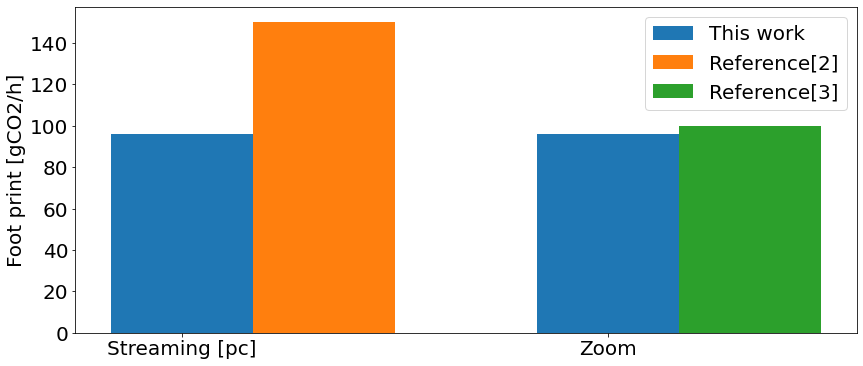

In [206]:
fig1, axc = plt.subplots(figsize=(14,6))

A1=[0,0]
A2=[96,96]
B1=[0]
B2=[150]
C1=[0]
C2=[100]
data = A2
labels = ['Streaming [pc]' ,'Zoom']
plt.bar(3*np.arange(len(A2)), data, bottom=A1,width=1,tick_label=labels,label='This work')
plt.bar(3*np.arange(len(B2))+1, B2, bottom=B1,width=1,label='Reference[2]')
plt.bar(3*np.arange(len(C2))+4, C2, bottom=C1,width=1,label='Reference[3]')
plt.legend()
plt.ylabel('Foot print [gCO2/h]')
plt.show()